#Data Vizualization
Let's have a look at the data which we are going to use in the Paris Airbnb Price machine learning project.

The dataset is available at http://insideairbnb.com/get-the-data.html under a Creative Commons CC0 1.0 Universal (CC0 1.0) "Public Domain Dedication" license.

In [ ]:
%bash
pip3 install folium

First, let's have a look at the dataset and the columns it contains.

In [35]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
import folium

dataset = pd.read_csv('data/listings.csv', low_memory=False)
print(dataset.columns)
print('Dataset shape: {}'.format(dataset.shape))

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

As we can see, there are many variables. We are going to keep only the interesting, relevent, and clean ones.

In [36]:
# Keeping only the relevant variables
dataset = dataset[['host_is_superhost', 'property_type','room_type','bed_type','latitude','longitude',
                   'accommodates','bathrooms','bedrooms','number_of_reviews','review_scores_accuracy',
                   'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                   'review_scores_location','review_scores_value','price','cleaning_fee']]
# We drop all the examples which do not contain a price (our dependent variable)
dataset = dataset.dropna(subset=['price'])
# Making the prices and cleaning fees readable(they currently include the '$' sign)
# Adding the prices and cleaning fees to keep a single dependent variable
dataset['price'] = dataset['price'].replace('[\$,]', '', regex=True).astype(float) + dataset['cleaning_fee'].replace('[\$,]', '', regex=True).fillna(0).astype(float)
dataset = dataset.drop(columns=['cleaning_fee'])
print('Dataset shape: {}'.format(dataset.shape))

Dataset shape: (59881, 17)


Now, let's vizualize the geographic repartition of the airbnb flats in Paris!

In [49]:
dataset_sample = dataset.sample(1000)

map = folium.Map(location=[dataset['latitude'].mean(),dataset['longitude'].mean()], tiles='OpenStreetMap', zoom_start=12)

for i in range(0,len(dataset_sample)):
   folium.Circle(
      location=[dataset_sample.iloc[i]['latitude'], dataset_sample.iloc[i]['longitude']],
      radius=1,
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(map)

map

Let's have a look at the correlation between the variables.

/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


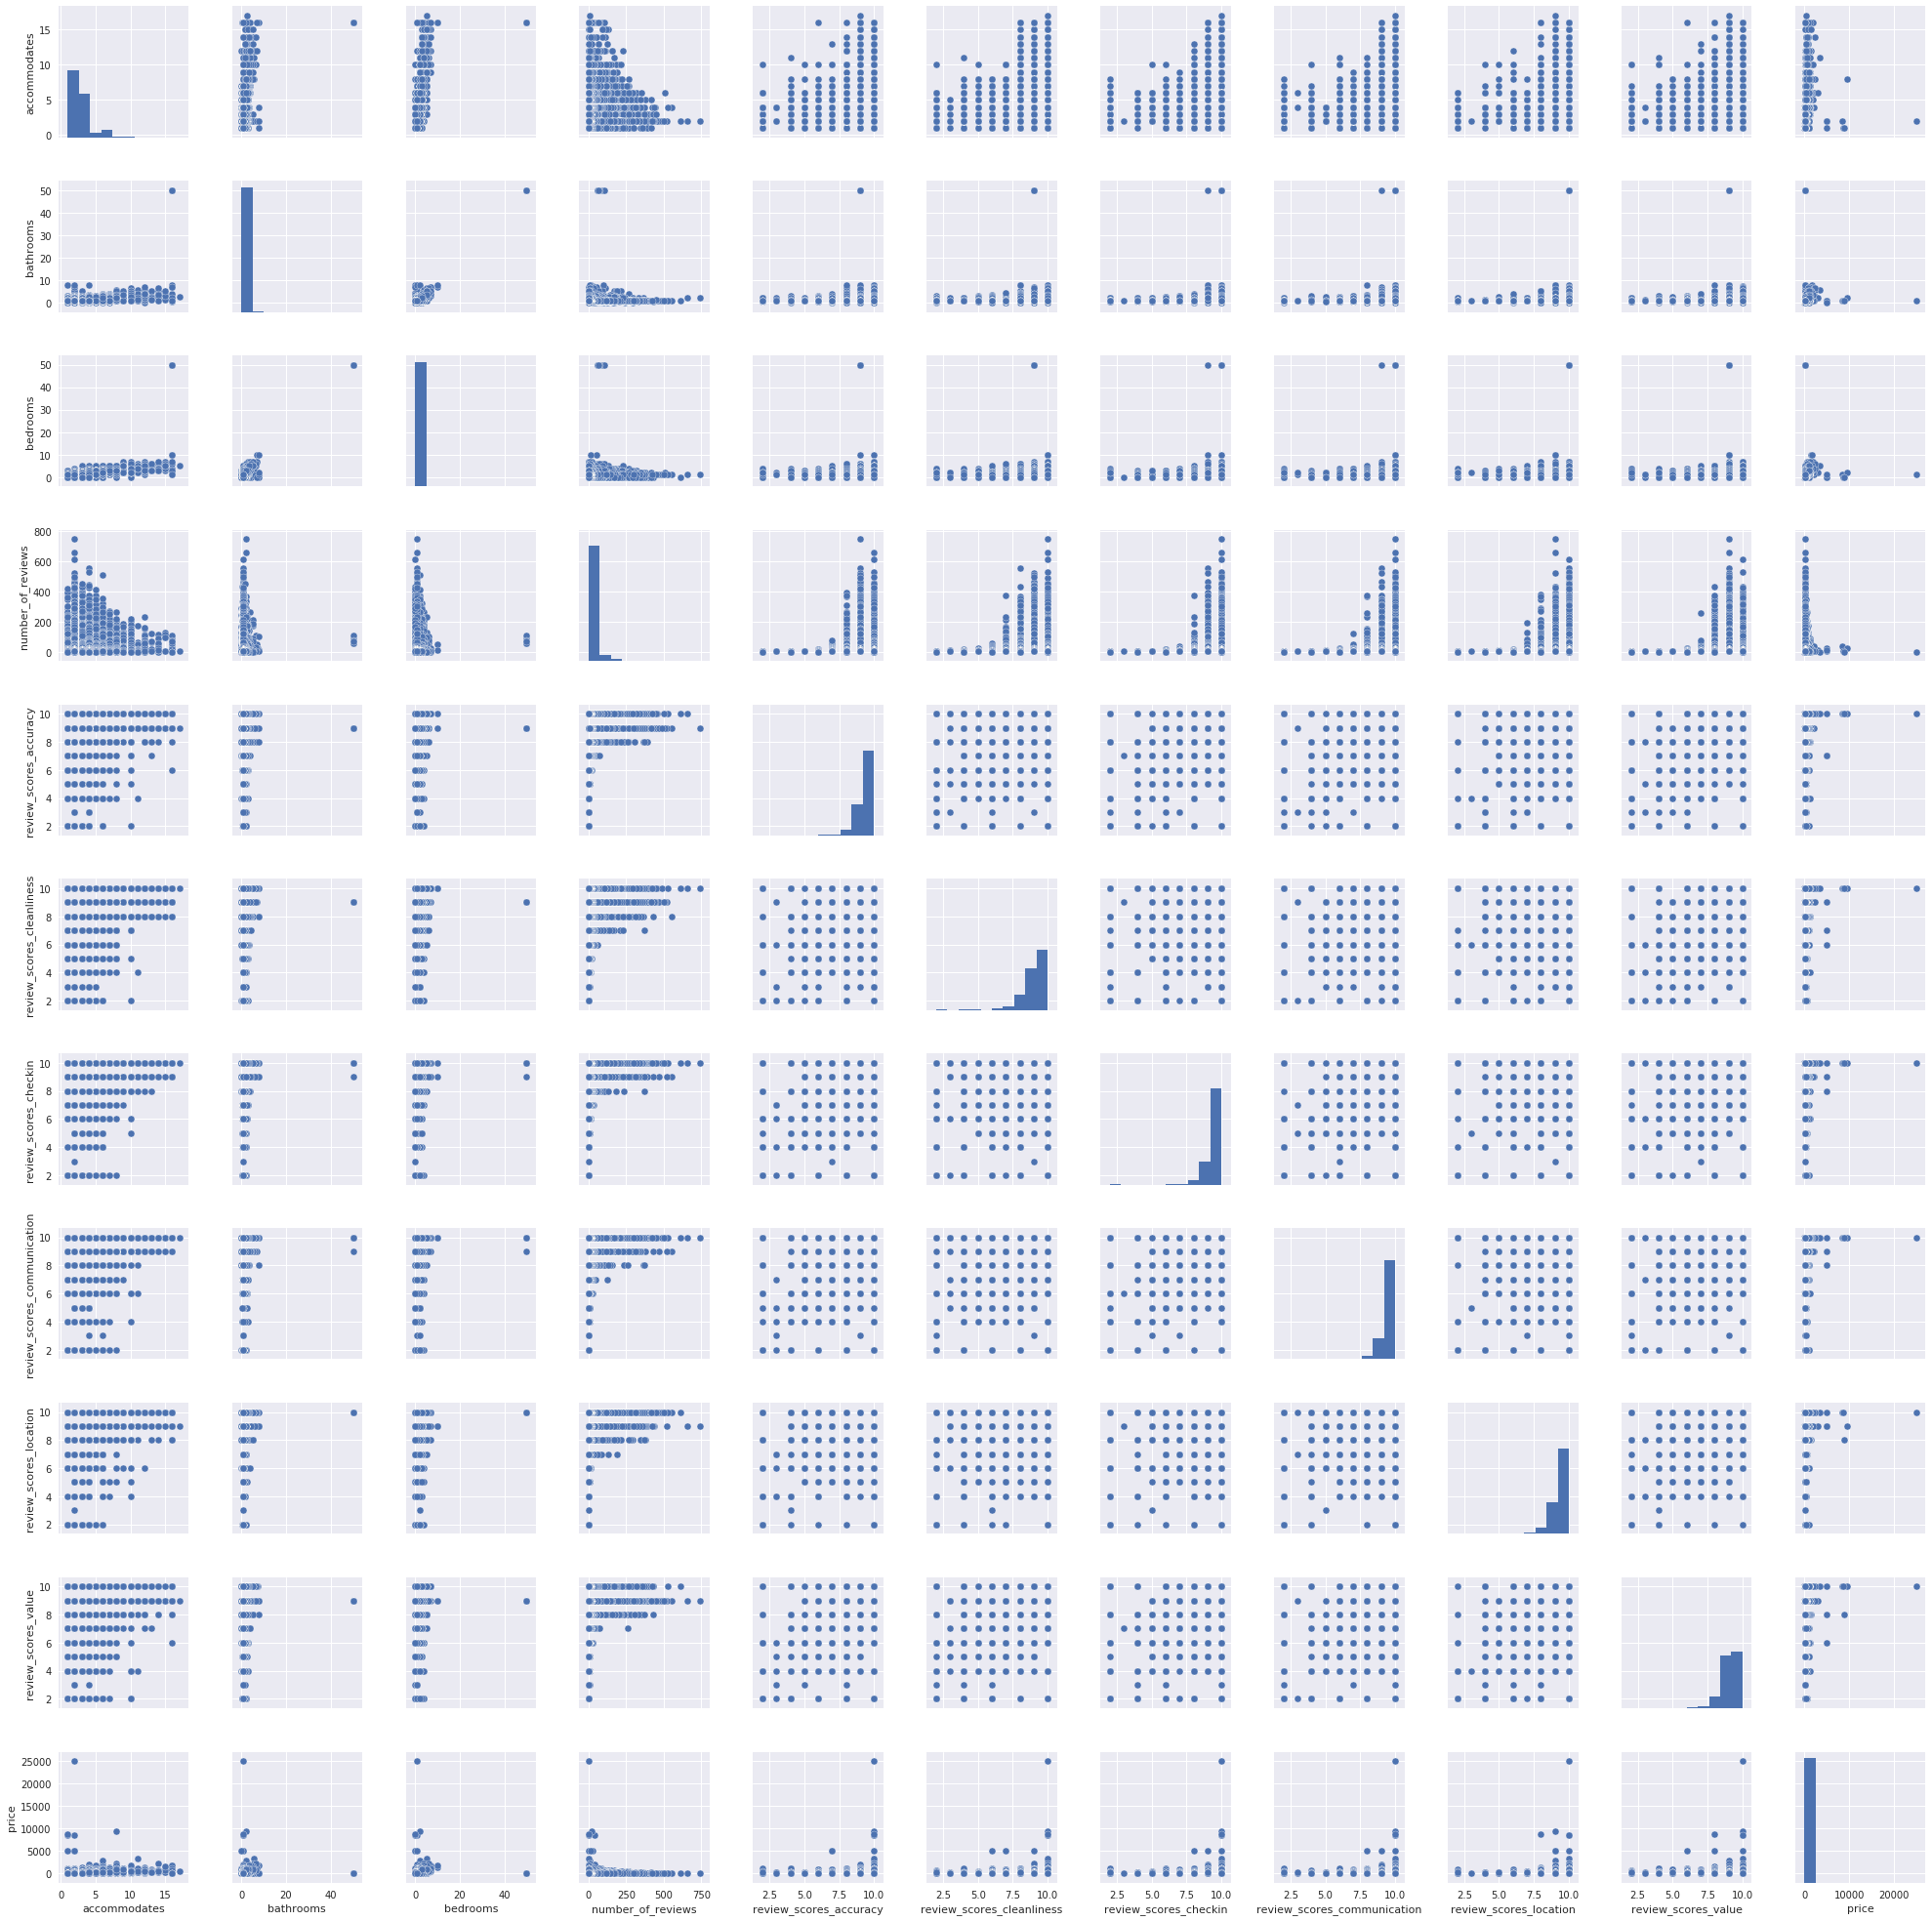

In [46]:
# Dropping rows with NaN values
clean_dataset = dataset[['accommodates','bathrooms','bedrooms','number_of_reviews','review_scores_accuracy',
                   'review_scores_cleanliness','review_scores_checkin','review_scores_communication',
                   'review_scores_location','review_scores_value','price']].dropna()
# Dropping outliers
from scipy import stats
clean_dataset[(np.abs(stats.zscore(clean_dataset)) < 3).all(axis=1)]

# Basic correlogram
sns.pairplot(clean_dataset)
sns.plt.show()